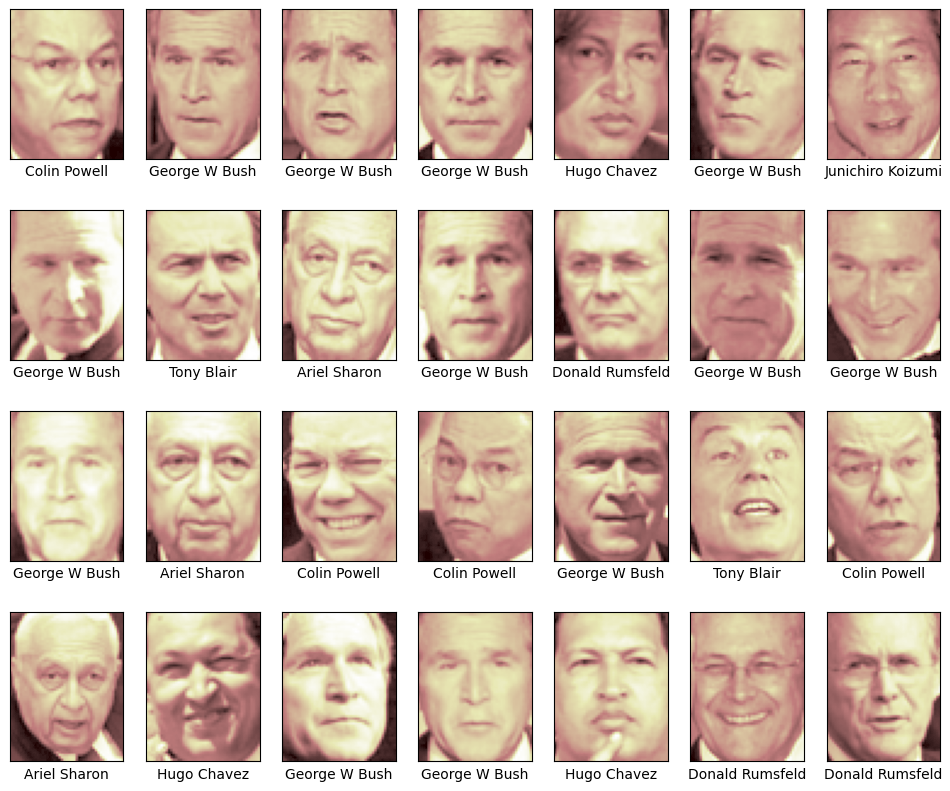

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.datasets import fetch_lfw_people # this will download images

faces = fetch_lfw_people(min_faces_per_person=60) # if you don't already have them

fig, ax = plt.subplots(4, 7, figsize=(12, 10))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='pink')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

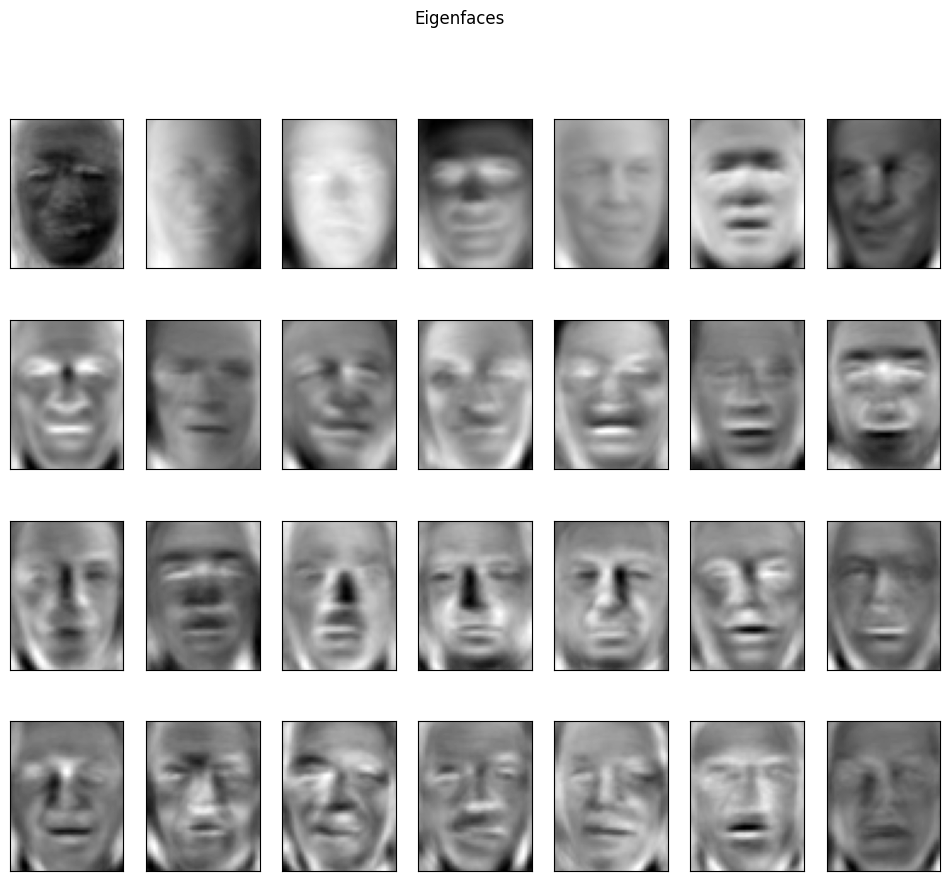

In [ ]:

from sklearn.decomposition import PCA


# Apply PCA to the dataset
n_components = 28  # Number of eigenfaces to display
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(faces.data)

# Get the eigenfaces
eigenfaces = pca.components_.reshape((n_components, faces.images.shape[1], faces.images.shape[2]))

# Create a subplot for displaying the eigenfaces
fig, axes = plt.subplots(4, 7, figsize=(12, 10))
for i, ax in enumerate(axes.flat):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set(xticks=[], yticks=[])

plt.suptitle('Eigenfaces')
plt.show()


In [ ]:


# Flatten the images and standardize the data
X = faces.data
X = X - np.mean(X, axis=0)

# Number of principal components to retain
n_components = 28

# Perform PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Calculate the Frobenius norm of the original data
frobenius_norm_original = np.linalg.norm(X, 'fro')

# Calculate the Frobenius norm of the PCA-transformed data
frobenius_norm_pca = np.linalg.norm(X_pca, 'fro')

# Calculate the variance in Frobenius norm
variance_frobenius_norm = (frobenius_norm_original**2 - frobenius_norm_pca**2) / (X.shape[0] - 1)

print("Frobenius Norm of Original Data:", frobenius_norm_original)
print("Frobenius Norm of PCA-Transformed Data:", frobenius_norm_pca)
print("Variance in Frobenius Norm:", variance_frobenius_norm)


Frobenius Norm of Original Data: 296.7266
Frobenius Norm of PCA-Transformed Data: 260.1537
Variance in Frobenius Norm: 15.12006710622454


In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people



# Flatten the images and standardize the data
X = faces.data
X = X - np.mean(X, axis=0)

# Perform PCA to find N
total_variance = np.sum(np.var(X, axis=0))
n_components = X.shape[1]  # Start with the maximum number of components

# Define the desired explained variance ratio (95% in this case)
desired_variance_ratio = 0.95

cumulative_variance = 0
for i in range(n_components):
    pca = PCA(n_components=i + 1)
    pca.fit(X)
    cumulative_variance = np.sum(pca.explained_variance_)
    if cumulative_variance / total_variance >= desired_variance_ratio:
        n_components = i + 1
        break

print("The least number of dimensions (N) to retain at least 95% of the variance:", n_components)


The least number of dimensions (N) to retain at least 95% of the variance: 184


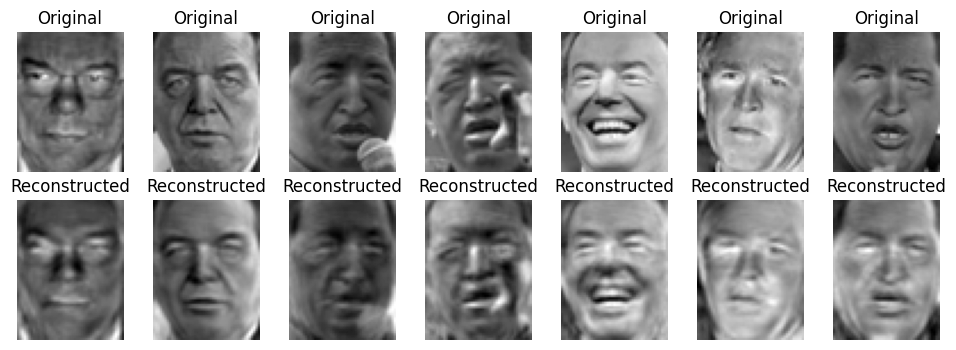

In [ ]:
import matplotlib.pyplot as plt

# Perform PCA with N components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Keep the last seven images
last_seven_images = X[-7:]

# Compute the representations of the last seven images using N eigenfaces
representations = pca.transform(last_seven_images)

# Reconstruct the images from the representations
reconstructed_images = pca.inverse_transform(representations)

# Plot the original and reconstructed images
fig, axes = plt.subplots(2, 7, figsize=(12, 4))
for i in range(7):
    axes[0, i].imshow(last_seven_images[i].reshape(faces.images.shape[1:]), cmap='gray')
    axes[0, i].axis('off')
    axes[0, i].set_title("Original")

    axes[1, i].imshow(reconstructed_images[i].reshape(faces.images.shape[1:]), cmap='gray')
    axes[1, i].axis('off')
    axes[1, i].set_title("Reconstructed")

plt.show()
